In [213]:
import pandas as pd
import isodate
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupShuffleSplit
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [220]:
mms = preprocessing.MinMaxScaler()

In [230]:
df = pd.read_csv("data_transformed.csv").drop("Unnamed: 0", axis=1)
predictors = [
    "category", "timePeriod", "duration", "definition", "caption",
    "publishedAtMonth", "publishedAtDay", "publishedAtYear", 
    "publishedAtHour", "publishedAtMinute", "publishedAtSec", "age"
]
df["caption"] = df["caption"].astype(np.int32)
X, y = pd.get_dummies(df[predictors]), df["log_views"]
y = y.astype(np.float64)
X["duration"] = X["duration"].astype(np.int64)
X["age"] = X["age"].astype(np.int64)
X = mms.fit_transform(X)

## Regression

In [231]:
train_X, test_X, train_y , test_y = train_test_split(X, y, train_size=0.8)

In [232]:
model1 = tf.keras.Sequential(
    [   
        layers.Dense(512, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1),
    ]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(train_X, train_y, epochs=30, callbacks=[callback])

Epoch 1/30
20/20 [==============================] - 0s 1ms/step - loss: 181.0128
Epoch 2/30
20/20 [==============================] - 0s 944us/step - loss: 42.2927
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 6.2256
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 4.1244
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 3.0370
Epoch 6/30
20/20 [==============================] - 0s 942us/step - loss: 2.7225
Epoch 7/30
20/20 [==============================] - 0s 886us/step - loss: 2.3899
Epoch 8/30
20/20 [==============================] - 0s 842us/step - loss: 2.4171
Epoch 9/30
20/20 [==============================] - 0s 906us/step - loss: 2.3005
Epoch 10/30
20/20 [==============================] - 0s 918us/step - loss: 2.3017
Epoch 11/30
20/20 [==============================] - 0s 882us/step - loss: 2.0481
Epoch 12/30
20/20 [==============================] - 0s 876us/step - loss: 2.0006
Epoch 13/30
20/20 [===========

In [233]:
model1.evaluate(test_X, test_y)

5/5 [==============================] - 0s 697us/step - loss: 2.3074


2.3074052333831787

## Classification

In [228]:
def set_class(v):
    if v < 13: return "low"
    if v < 15: return "medium"
    return "high"

In [281]:
df = pd.read_csv("data_transformed.csv").drop("Unnamed: 0", axis=1)
predictors = [
    "category", "timePeriod", "duration", "definition", "caption",
    "publishedAtMonth", "publishedAtDay", "publishedAtYear", 
    "publishedAtHour", "publishedAtMinute", "publishedAtSec", "age"
]
df["caption"] = df["caption"].astype(np.int32)
X, y = pd.get_dummies(df[predictors]), pd.get_dummies(df["log_views"].map(set_class))
X["duration"] = X["duration"].astype(np.int64)
X["age"] = X["age"].astype(np.int64)
X = mms.fit_transform(X)

In [282]:
train_X, test_X, train_y , test_y = train_test_split(X, y, train_size=0.8)

In [283]:
model2 = tf.keras.Sequential(
    [
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(3, activation="softmax"),
    ]
)
model2.compile(loss='categorical_crossentropy', optimizer="RMSprop", metrics=[tf.keras.metrics.CategoricalAccuracy()])
model2.fit(train_X, train_y, epochs=30)

Epoch 1/30
20/20 [==============================] - 0s 1ms/step - loss: 0.9824 - categorical_accuracy: 0.5033
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7957 - categorical_accuracy: 0.6742
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7569 - categorical_accuracy: 0.6659
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7350 - categorical_accuracy: 0.6683
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7587 - categorical_accuracy: 0.6660
Epoch 6/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7070 - categorical_accuracy: 0.6764
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6677 - categorical_accuracy: 0.7226
Epoch 8/30
20/20 [==============================] - 0s 988us/step - loss: 0.7156 - categorical_accuracy: 0.6966
Epoch 9/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6639 - categorical_accuracy: 0.6894
Epoch 10

In [284]:
model2.evaluate(test_X, test_y)

5/5 [==============================] - 0s 788us/step - loss: 0.6888 - categorical_accuracy: 0.6948


[0.6887690424919128, 0.6948052048683167]

In [288]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    import itertools
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_y = test_y.idxmax(axis=1)

In [289]:
predict = model2.predict(test_X)
predict_class = np.argmax(predict, axis=1)
predict_class = list(map(lambda c: ["high", "low", "medium"][c], predict_class))

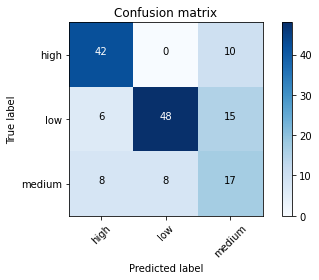

In [290]:
cnf_matrix = confusion_matrix(predict_class, test_y, labels=['high', 'low', 'medium'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high', 'low', 'medium'],
                      title='Confusion matrix')